In [36]:
# NHL Statistics: Final Project by Josie Light
# importing all requests

import requests
import pprint as pprint 
import csv
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
pd.options.display.max_columns = 200
import seaborn as sb 
%matplotlib inline

In [37]:
# NHL API
# making a requst to the NHL api for the 2020-2021 season
liveGameStatsDF = requests.get("https://statsapi.web.nhl.com/api/v1/game/2020020001/feed/live").json()
liveGameStatsDF["gameData"].keys()

dict_keys(['game', 'datetime', 'status', 'teams', 'players', 'venue'])

In [38]:
# using pandas to display max columns and range
pd.options.display.max_columns = 200
# using transpose in order to flip the columns and rows, as well as calling the dataframe to print
# I will name it liveGameStatsDF
liveGameStatsDF = pd.DataFrame(liveGameStatsDF["gameData"]["players"]).transpose()
liveGameStatsDF

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,currentTeam,primaryPosition,birthStateProvince
ID8476927,8476927,Teddy Blueger,/api/v1/people/8476927,Teddy,Blueger,53,1994-08-15,26,Riga,LVA,LVA,"6' 0""",185,True,False,False,False,L,Y,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'C', 'name': 'Center', 'type': 'Forwa...",NaN
ID8476906,8476906,Shayne Gostisbehere,/api/v1/people/8476906,Shayne,Gostisbehere,53,1993-04-20,28,Pembroke Pines,USA,USA,"5' 11""",180,True,False,False,False,L,Y,"{'id': 4, 'name': 'Philadelphia Flyers', 'link...","{'code': 'D', 'name': 'Defenseman', 'type': 'D...",FL
ID8473512,8473512,Claude Giroux,/api/v1/people/8473512,Claude,Giroux,28,1988-01-12,33,Hearst,CAN,CAN,"5' 11""",185,True,False,True,False,R,Y,"{'id': 4, 'name': 'Philadelphia Flyers', 'link...","{'code': 'C', 'name': 'Center', 'type': 'Forwa...",ON
ID8478507,8478507,John Marino,/api/v1/people/8478507,John,Marino,6,1997-05-21,23,North Easton,USA,USA,"6' 1""",181,True,False,False,False,R,Y,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'D', 'name': 'Defenseman', 'type': 'D...",MA
ID8471675,8471675,Sidney Crosby,/api/v1/people/8471675,Sidney,Crosby,87,1987-08-07,33,Cole Harbour,CAN,CAN,"5' 11""",200,True,False,True,False,L,Y,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'C', 'name': 'Center', 'type': 'Forwa...",NS
ID8477979,8477979,Nicolas Aube-Kubel,/api/v1/people/8477979,Nicolas,Aube-Kubel,62,1996-05-10,24,Slave Lake,CAN,CAN,"5' 11""",187,True,False,False,False,R,Y,"{'id': 4, 'name': 'Philadelphia Flyers', 'link...","{'code': 'R', 'name': 'Right Wing', 'type': 'F...",AB
ID8474027,8474027,Justin Braun,/api/v1/people/8474027,Justin,Braun,61,1987-02-10,34,Minneapolis,USA,USA,"6' 2""",205,True,False,False,False,R,Y,"{'id': 4, 'name': 'Philadelphia Flyers', 'link...","{'code': 'D', 'name': 'Defenseman', 'type': 'D...",MN
ID8475810,8475810,Bryan Rust,/api/v1/people/8475810,Bryan,Rust,17,1992-05-11,28,Pontiac,USA,USA,"5' 11""",192,True,False,False,False,R,Y,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'R', 'name': 'Right Wing', 'type': 'F...",MI
ID8477955,8477955,Jared McCann,/api/v1/people/8477955,Jared,McCann,19,1996-05-31,24,Stratford,CAN,CAN,"6' 1""",185,True,False,False,False,L,Y,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'L', 'name': 'Left Wing', 'type': 'Fo...",ON
ID8471215,8471215,Evgeni Malkin,/api/v1/people/8471215,Evgeni,Malkin,71,1986-07-31,34,Magnitogorsk,RUS,RUS,"6' 3""",195,True,True,False,False,L,I,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link...","{'code': 'C', 'name': 'Center', 'type': 'Forwa...",NaN


In [39]:
# grabbing the top 20 heaviest players this season 
weightPerPlayer =liveGameStatsDF.sort_values("weight",ascending=False)[["fullName","weight"]].head(20)
weightPerPlayer

,fullName,weight
ID8474037,James van Riemsdyk,217
ID8475763,Kevin Hayes,216
ID8474161,Jakub Voracek,214
ID8476873,Mark Jankowski,212
ID8476461,Sean Couturier,211
ID8476879,Cody Ceci,210
ID8479026,Philippe Myers,210
ID8475208,Brian Dumoulin,207
ID8474027,Justin Braun,205
ID8477462,Robert Hagg,204


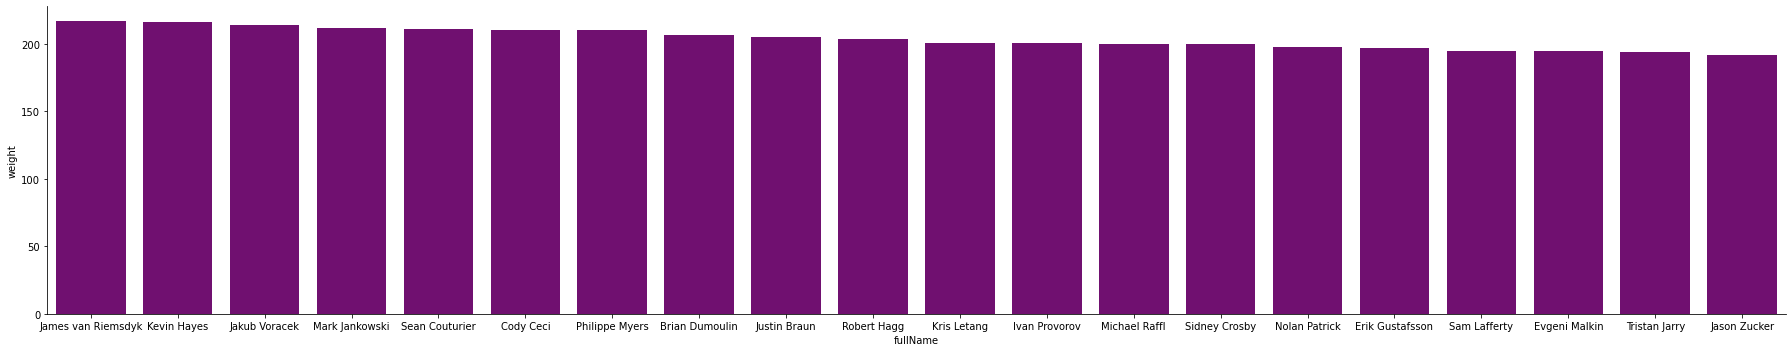

In [40]:
# plotting this data using seaborn and plotting a bar graph, this will visually show the differences 
# in weight
playerWeightCatplot = sb.catplot(x="fullName",y="weight",data=weightPerPlayer,kind="bar",aspect=5,color="Purple")
playerWeightCatplot

In [41]:
# grabbing the age of the first 20 players 
agePerPlayer = liveGameStatsDF.sort_values("currentAge",ascending=False)[["fullName","currentAge"]].head(20)
agePerPlayer

,fullName,currentAge
ID8471724,Kris Letang,34
ID8474027,Justin Braun,34
ID8471215,Evgeni Malkin,34
ID8473512,Claude Giroux,33
ID8471675,Sidney Crosby,33
ID8474098,Colton Sceviour,32
ID8477290,Michael Raffl,32
ID8474161,Jakub Voracek,31
ID8474037,James van Riemsdyk,31
ID8477244,Chad Ruhwedel,30


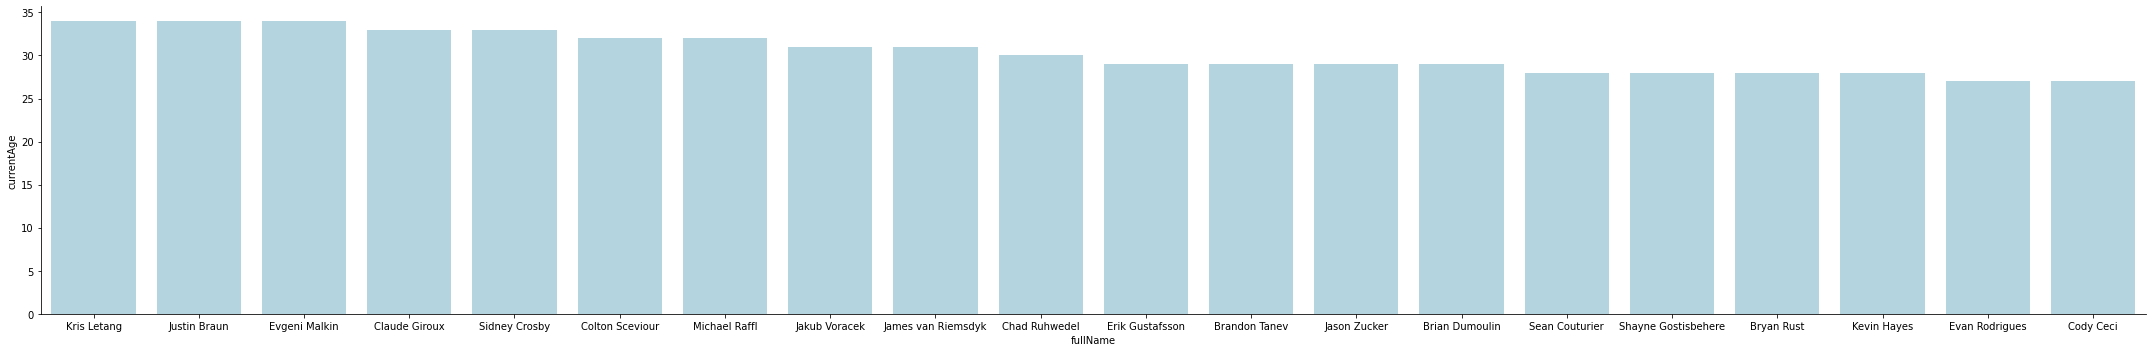

In [42]:
# plotting this data using seaborn and visually seeing the difference between the players ages 
playerAgeCatplot = sb.catplot(x="fullName",y="currentAge",data=agePerPlayer,kind="bar",aspect=6,color="LightBlue")
playerAgeCatplot

In [43]:
# grabbing the height of each player
# it is interesting ot see the height of each player, considering for some positions some are below average 
heightPerPlayer = liveGameStatsDF.sort_values("height",ascending=False)[["fullName","height"]]
heightPerPlayer

,fullName,height
ID8479026,Philippe Myers,"6' 5"""
ID8475763,Kevin Hayes,"6' 5"""
ID8476873,Mark Jankowski,"6' 4"""
ID8475208,Brian Dumoulin,"6' 4"""
ID8471215,Evgeni Malkin,"6' 3"""
ID8477969,Marcus Pettersson,"6' 3"""
ID8477948,Travis Sanheim,"6' 3"""
ID8476461,Sean Couturier,"6' 3"""
ID8474037,James van Riemsdyk,"6' 3"""
ID8477462,Robert Hagg,"6' 2"""


In [44]:
# start of NHL stats bigboard csv 
nhlGameLogsDF = pd.read_csv("NHL_bigboard.csv")
pd.options.display.max_columns = 200
nhlGameLogsDF

,Name,Compare,Pos,Age,Shoots,Team,GP,G,A,PTS,PTS/GP,Season Pace,82GP Pace,GWG,PPP,PPTOI,%PP,TOI,SOG,+/-,PIM,Yrs,Sal,Caphit,AAV
0,CONNOR MCDAVID,NaN,C,24,L,EDM,42,23,46,69,1.64,135,135,8,26,04:24,87.4,22:32,152,12,16,5,$14M,$12.5M,$12.5M
1,LEON DRAISAITL,NaN,C,25,L,EDM,42,22,39,61,1.45,119,119,6,24,04:27,88.6,22:09,123,23,16,4,$9M,$8.5M,$8.5M
2,MITCHELL MARNER,NaN,R,23,R,TOR,44,14,40,54,1.23,101,101,2,13,03:06,68.5,22:32,124,17,18,4,$15M,$10.9M,$10.9M
3,PATRICK KANE,NaN,R,32,L,CHI,44,14,40,54,1.23,101,101,2,19,03:52,73.1,22:16,149,2,14,2,$7M,$10.5M,$10.5M
4,AUSTON MATTHEWS,NaN,C,23,L,TOR,40,32,21,53,1.33,103,109,9,11,03:13,70.2,21:57,162,17,10,3,$15.9M,$11.64M,$11.64M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,JAYSON MEGNA,NaN,C,31,R,COL,4,0,0,0,0.00,0,0,0,0,00:00,0.0,10:03,5,0,0,0,$0.7M,$0.7M,$0.7M
855,CALEN ADDISON,NaN,D,21,R,MIN,3,0,0,0,0.00,0,0,0,0,02:45,44.6,18:31,4,0,0,2,$0.79M,$0.8M,$0.91M
856,GLENN GAWDIN,NaN,C,24,R,CGY,5,0,0,0,0.00,0,0,0,0,00:00,0.0,05:42,0,-2,0,0,$0.7M,$0.7M,$0.7M
857,CARSEN TWARYNSKI,NaN,L,23,L,PHI,4,0,0,0,0.00,0,0,0,0,00:00,0.0,09:20,2,-3,2,0,$0.79M,$0.78M,$0.93M


In [45]:
# calculating how many players play each position using value_counts
nhlGameLogsDF["Pos"].value_counts()
# seeing how many players play a particular position 

D    298
C    284
L    154
R    123
Name: Pos, dtype: int64

In [46]:
# using groupby to group all the players based off their PTS/GP
# I am doing this because having at least a 1 or higher would consider you to be payed more 
# although, depending on when players signed a contract, the money can differ 
# also using reset_index and .head to specify I only want the top 15, this will make it easier to see the graph
ptsGpPerPlayer = nhlGameLogsDF.groupby("Name").agg({"PTS/GP":max}).sort_values("PTS/GP",ascending=False).reset_index().head(15)
ptsGpPerPlayer

,Name,PTS/GP
0,CONNOR MCDAVID,1.64
1,LEON DRAISAITL,1.45
2,ARTEMI PANARIN,1.44
3,NATHAN MACKINNON,1.36
4,AUSTON MATTHEWS,1.33
5,BRAD MARCHAND,1.25
6,MITCHELL MARNER,1.23
7,PATRICK KANE,1.23
8,MIKKO RANTANEN,1.21
9,MARK SCHEIFELE,1.18


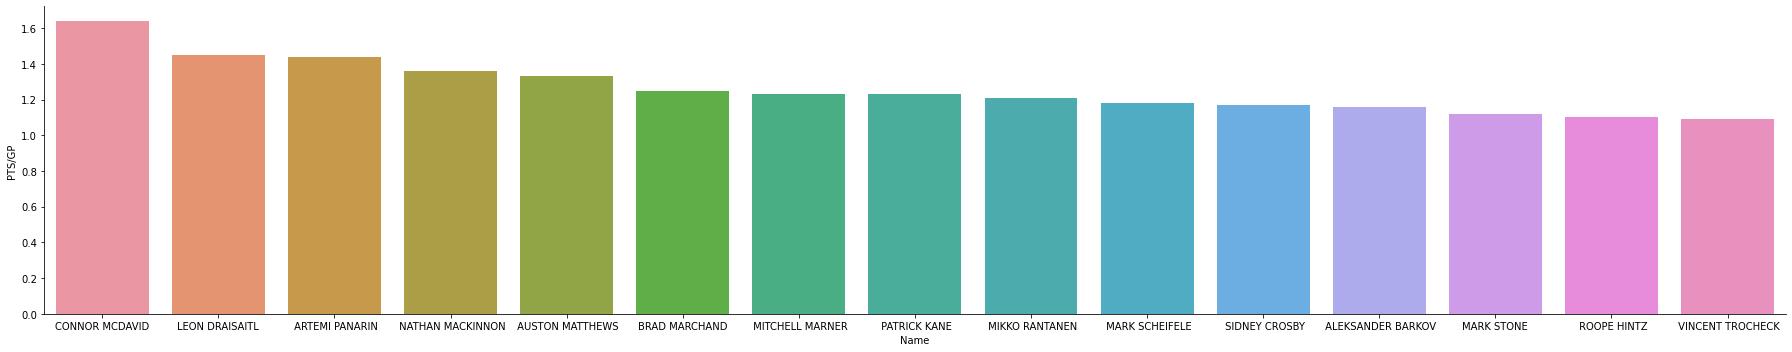

In [47]:
# plotting the above dataframe using seaborn and the data will be stored in a variable called ptsGpPerPlayer
# this will give me a visual representation of each player and their ptsGpPerPlayer
sb.catplot(x="Name",y="PTS/GP",data= ptsGpPerPlayer,kind="bar",aspect=5)

In [48]:
# now I want to see games played, points, salary along with each players Points per game 
# printing the dataframe to show each number of game played so it is more clear of what the datafram states above
# I will be using sort_values in order to get the correct statistic
# I also want to see the players ascending from the highest points per game because their salaries will be higher
nhlGameLogsDF.sort_values("PTS/GP",ascending=False)[["Name","GP","PTS","Sal","PTS/GP"]].head(25)

,Name,GP,PTS,Sal,PTS/GP
0,CONNOR MCDAVID,42,69,$14M,1.64
1,LEON DRAISAITL,42,61,$9M,1.45
11,ARTEMI PANARIN,32,46,$13M,1.44
5,NATHAN MACKINNON,39,53,$6.15M,1.36
4,AUSTON MATTHEWS,40,53,$15.9M,1.33
8,BRAD MARCHAND,40,50,$5M,1.25
2,MITCHELL MARNER,44,54,$15M,1.23
3,PATRICK KANE,44,54,$7M,1.23
6,MIKKO RANTANEN,43,52,$12M,1.21
7,MARK SCHEIFELE,44,52,$5.5M,1.18


In [49]:
# I am now going to compare the Goals and Assists, as well as salaries
# Gamesplayed is important, but so are the the added points as Assists
# these are also factored into Pts/GP, so the more points, the more you are paid 
# The higher the PTS/GP as stated above, the more you are to make 
# Here I can see that Austin Mathews is the highest paid, yet in the DF above, Connor McDavid has a higher PTS/GP
# This comparison has led to me realizing that Austin Mathews is a better goal scorer, which makes him paid more 
# almost 2 million more 
nhlGameLogsDF.groupby("Name").agg({"G":sum,"A":sum,"Sal":max}).sort_values("G",ascending=False).reset_index().head(20)

,Name,G,A,Sal
0,AUSTON MATTHEWS,32,21,$15.9M
1,MIKKO RANTANEN,26,26,$12M
2,CONNOR MCDAVID,23,46,$14M
3,LEON DRAISAITL,22,39,$9M
4,ALEX OVECHKIN,22,17,$10M
5,KYLE CONNOR,21,22,$8M
6,ALEX DEBRINCAT,21,21,$5.1M
7,BRAD MARCHAND,21,29,$5M
8,MAX PACIORETTY,21,20,$7M
9,TYLER TOFFOLI,21,11,$3.25M


In [50]:
# finding the highest PTS/GP associated with their salary, to display the highest paid players
# I want to display the top 20 players with the highest PTS/GP
ptsGPSal= nhlGameLogsDF.sort_values("PTS/GP",ascending=False)[["Name","Sal","PTS/GP"]].head(20)
ptsGPSal

,Name,Sal,PTS/GP
0,CONNOR MCDAVID,$14M,1.64
1,LEON DRAISAITL,$9M,1.45
11,ARTEMI PANARIN,$13M,1.44
5,NATHAN MACKINNON,$6.15M,1.36
4,AUSTON MATTHEWS,$15.9M,1.33
8,BRAD MARCHAND,$5M,1.25
2,MITCHELL MARNER,$15M,1.23
3,PATRICK KANE,$7M,1.23
6,MIKKO RANTANEN,$12M,1.21
7,MARK SCHEIFELE,$5.5M,1.18


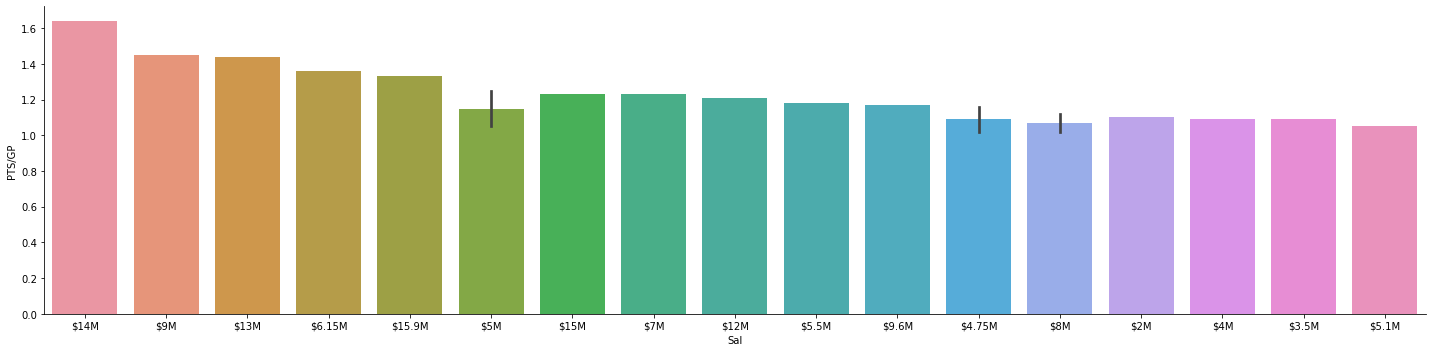

In [51]:
# Here I want to plot what I printed above, I stored it in a variable called ptsGPSal
playerAgeCatplot = sb.catplot(x="Sal",y="PTS/GP",data=ptsGPSal,kind="bar",aspect=4)
playerAgeCatplot

In [52]:
# NHL STATS Advanced Stats 
# second csv and last source to go more in depth on goals and points 
nhlPlayerStatsDF = pd.read_csv("NHL_AdvancedStats.csv")

In [53]:
nhlPlayerStatsDF

,Name,Compare,Pos,Age,Team,GP,ZS%,PDO,5on5 SV%,5on5 S%,CF%,%PP,IPP,ES IPP,PP IPP,PTS/60,Sec Asst,Sec Asst %
0,AUSTON MATTHEWS,NaN,C,23,TOR,40,57.2,1040,0.918,12.2,53.4,70.2,79.1,82.4,68.8,33.4,8,38.1
1,MIKKO RANTANEN,NaN,R,24,COL,43,68.3,1038,0.922,11.6,62.4,69.0,66.7,66.0,67.9,27.8,12,46.2
2,CONNOR MCDAVID,NaN,C,24,EDM,42,63.7,1007,0.904,10.3,54.2,87.4,79.3,84.3,72.2,25.9,14,30.4
3,ALEX OVECHKIN,NaN,L,35,WSH,41,71.3,1037,0.914,12.3,47.1,93.7,61.8,62.5,60.7,25.3,7,38.9
4,LEON DRAISAITL,NaN,C,25,EDM,42,53.3,1050,0.938,11.2,51.1,88.6,71.8,73.5,68.6,24.5,14,35.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,MARTIN FRK,NaN,R,27,L.A,1,0.0,800,0.800,0.0,33.3,23.6,0.0,0.0,0.0,0.0,0,0.0
855,ANDY WELINSKI,NaN,D,27,ANA,10,60.6,1122,0.972,15.0,45.3,29.0,0.0,0.0,0.0,0.0,0,0.0
856,JOACHIM BLICHFELD,NaN,R,22,S.J,2,80.0,1000,1.000,0.0,63.1,22.5,0.0,0.0,0.0,0.0,0,0.0
857,JARRED TINORDI,NaN,D,29,BOS,19,49.2,953,0.892,6.1,46.9,0.4,0.0,0.0,0.0,0.0,0,0.0


In [54]:
# numbers are the same as lsat csv file, this is a good thing 
nhlPlayerStatsDF["Pos"].value_counts()

D    298
C    284
L    154
R    123
Name: Pos, dtype: int64

In [55]:
# I will not into second assists, as they also pertain to the above dataframe when I was comparing 
# salary to PTS/GP
# in this case, I can see that Tyson Barrie is the number one person for second assists
# yet, I did not see him in the DF above when I looked at PTS/GP
# so, I will look for him again below to see his salary 
# I will be using .agg to calculate the GP, Sec Asst, and PTS/60
nhlPlayerStatsDF.groupby("Name").agg({"GP":sum,"Sec Asst":sum,"PTS/60":np.mean}).sort_values("Sec Asst",ascending=False).reset_index().head(20)

,Name,GP,Sec Asst,PTS/60
0,TYSON BARRIE,42,21,7.0
1,NICKLAS BACKSTROM,45,18,16.2
2,ADAM FOX,43,18,7.0
3,MARK SCHEIFELE,44,18,19.3
4,GABRIEL LANDESKOG,41,17,17.8
5,SHEA THEODORE,40,17,7.8
6,JOHN CARLSON,45,17,11.8
7,FILIP HRONEK,45,16,3.1
8,SIDNEY CROSBY,43,16,19.2
9,DAVID PERRON,42,16,15.1


In [56]:
# as stated above, Tyson Barrie is only paid $3.57 million 
# there is a huge difference between goals and Assists, especially if you are just picking up second assists 
# this number compared ot Connor McDavid is HUGE
nhlGameLogsDF.query("Name == 'TYSON BARRIE'")["Sal"]

40    $3.75M
Name: Sal, dtype: object

In [57]:
# This would also explain a lot, he only had 5 goals that season, so he wouldn't necessarily be looked at as a 
# valued player
# his Caphit is the same level of his salary, which shows he doesn't produce much 
nhlGameLogsDF.query("Name == 'TYSON BARRIE'")[["G","GP","Sal","Caphit"]]

,G,GP,Sal,Caphit
40,5,42,$3.75M,$3.75M


In [58]:
# for example, I am now going to look at Connor McDavid, one of the highest paid players
# He has 23 goals in 42 games, whereass Tyson Barrie played the same amount of games, but only had 5 goals 
# So, this does answer my question on who gets paid more ---> The goals scorers and their bonuses 
# on their caphit can help, if they surpass what they are supposed to produce in a season 
nhlGameLogsDF.query("Name == 'CONNOR MCDAVID'")[["G","GP","Sal","Caphit"]]

,G,GP,Sal,Caphit
0,23,42,$14M,$12.5M


In [59]:
# now, going back to the nhlGameLogsDF, I will look at the lowest paid and lowest G,GP,A Player
nhlGameLogsDF.sort_values("Sal",ascending=True)[["Name","GP","G","A","Sal"]].head(20)
# I can see here that Brady Keeper only played 1 game, but still made $0.72
# this can also show that signing contracts during this time than 20 years ago means you can ask for more money
# for example, auston Matthew gets paid 15.9 million, plus bonuses AND he is able to get a more hefty contract
# because of his skill

,Name,GP,G,A,Sal
842,BRADY KEEPER,1,0,0,$0.72M
539,MATHIEU OLIVIER,29,3,2,$0.73M
527,KALE CLAGUE,18,0,6,$0.73M
629,JUHO LAMMIKKO,35,3,0,$0.73M
690,TANNER JEANNOT,4,1,0,$0.73M
624,ANTHONY BITETTO,9,1,2,$0.73M
621,JACK STUDNICKA,19,1,2,$0.73M
712,NICK CAAMANO,23,0,1,$0.73M
807,XAVIER OUELLET,5,0,0,$0.73M
806,KENNY AGOSTINO,1,0,0,$0.73M


In [60]:
# this project has shown that points, especially Goals and the PTS/GP a player has, can lead them to a more 
# succesful career 